In [3]:
from pandas import read_csv 

data=read_csv('/Users/Behnoush/Desktop/Python Projects/Cognitir course/Default.csv',index_col=0)

# The directory does not work "\" !!!
data[:10]

data=data.replace("Yes",1)
data=data.replace("No",0)
data[:10]


from sklearn.model_selection import train_test_split

# randomly divide the sample to a test and train sets
data_train, data_test = train_test_split(data, test_size=0.15)

from sklearn.naive_bayes import GaussianNB
import numpy as np

feature_cols = ["student","balance","income"]

X_train = data_train[feature_cols]
Y_train = data_train ['default'] 

#Y_train = data_train.default

# Train classifier
gnb=GaussianNB()
clf=gnb.fit(X_train,Y_train)


X_test = data_test[feature_cols]
Y_test = data_test.default

# Predict value
Y_pred = clf.predict(X_test)

Y_pred


print('Number of mislabeled points out of a total %d points: %d' %(X_test.shape[0], (Y_test != Y_pred).sum()))

X_test.shape
X_test.shape[0]
X_test.shape[1]

#import confusion matrix

from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Y_pred))

# ROC: Receiver Operating Characteristic (ROC)

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

Y_score = clf.predict_proba(X_test)
Y_score

from sklearn.metrics import roc_curve, auc
    
# Compute ROC metrics
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_score[:, 1], pos_label=1)
roc_auc = auc(false_positive_rate, true_positive_rate)
    
    
import matplotlib.pyplot as plt
# Plot ROC curve
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)


plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Number of mislabeled points out of a total 1500 points: 41
[[1449    5]
 [  36   10]]


<Figure size 640x480 with 1 Axes>

/Users/Behnoush/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/Behnoush/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/Behnoush/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/Behnoush/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


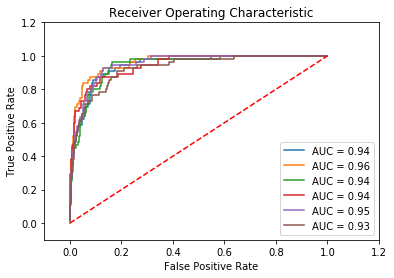

In [4]:
# Considering Cross Validation
from pandas import read_csv 
df=read_csv('/Users/Behnoush/Desktop/Python Projects/Cognitir course/Default.csv', index_col=0) 

df=df.replace("Yes",1)
df=df.replace("No",0)

from sklearn.model_selection import train_test_split

# randomly divide the sample to a test and train sets
data_train, data_test = train_test_split(df, test_size=0.15)

feature_cols = ["student","balance","income"]

X_train = data_train[feature_cols]
Y_train = data_train ['default'] 

X_test = data_test[feature_cols]
Y_test = data_test.default


from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import StratifiedKFold
# Configure cross validation
cv = StratifiedKFold(n_splits=6)

import matplotlib.pyplot as plt
# Create new plot
plt.figure()


# Get indices for training and test subsets for each fold
for i, (train, test) in enumerate(cv.split(df[feature_cols], df.default)):
    
    # Get training data
    X_train = df[feature_cols].as_matrix()[train, :]
    Y_train = df.default.as_matrix()[train,]
    
    # Get test data
    X_test = df[feature_cols].as_matrix()[test, :]
    Y_test = df.default.as_matrix()[test,]
    
    # Configure classifier
    clf = GaussianNB()
    
    # Learn classification model
    clf.fit(X_train, Y_train)
    
    # Get sample scores for ROC curve
    Y_score = clf.predict_proba(X_test)
    
    
    from sklearn.metrics import roc_curve, auc
    
    # Compute ROC metrics
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_score[:, 1], pos_label=1)
    roc_auc = auc(false_positive_rate, true_positive_rate)

    # Plot ROC curve
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)

plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()